In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

641

In [6]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | nemuro
Processing Record 6 of Set 1 | dudinka
Processing Record 7 of Set 1 | amderma
City not found. Skipping...
Processing Record 8 of Set 1 | toamasina
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | cherskiy
Processing Record 11 of Set 1 | new norfolk
Processing Record 12 of Set 1 | malwan
City not found. Skipping...
Processing Record 13 of Set 1 | aklavik
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | mar del plata
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | wajima
Processing Record 18 of Set 1 | aksu
Processing Record 19 of Set 1 | tuktoyaktuk
Processing Record 20 of Set 1 | kahului
Processing Record 21 of Set 1 | vaini
Proces

Processing Record 39 of Set 4 | batagay
Processing Record 40 of Set 4 | vestmannaeyjar
Processing Record 41 of Set 4 | sergeyevka
Processing Record 42 of Set 4 | waingapu
Processing Record 43 of Set 4 | camacupa
Processing Record 44 of Set 4 | lorengau
Processing Record 45 of Set 4 | russell
Processing Record 46 of Set 4 | ambon
Processing Record 47 of Set 4 | omboue
Processing Record 48 of Set 4 | tual
Processing Record 49 of Set 4 | marrakesh
Processing Record 50 of Set 4 | clyde river
Processing Record 1 of Set 5 | annau
Processing Record 2 of Set 5 | ilulissat
Processing Record 3 of Set 5 | cabo san lucas
Processing Record 4 of Set 5 | tshikapa
Processing Record 5 of Set 5 | thompson
Processing Record 6 of Set 5 | macia
Processing Record 7 of Set 5 | xiongzhou
Processing Record 8 of Set 5 | kjollefjord
Processing Record 9 of Set 5 | tiznit
Processing Record 10 of Set 5 | oktyabrskiy
Processing Record 11 of Set 5 | huarmey
Processing Record 12 of Set 5 | kasongo-lunda
Processing Rec

Processing Record 29 of Set 8 | iqaluit
Processing Record 30 of Set 8 | marsh harbour
Processing Record 31 of Set 8 | mlonggo
Processing Record 32 of Set 8 | havre-saint-pierre
Processing Record 33 of Set 8 | airai
Processing Record 34 of Set 8 | talnakh
Processing Record 35 of Set 8 | paamiut
Processing Record 36 of Set 8 | nombre de dios
Processing Record 37 of Set 8 | qax
Processing Record 38 of Set 8 | aitape
Processing Record 39 of Set 8 | kerema
Processing Record 40 of Set 8 | hihifo
City not found. Skipping...
Processing Record 41 of Set 8 | boyabat
Processing Record 42 of Set 8 | siemiatycze
Processing Record 43 of Set 8 | san clemente
Processing Record 44 of Set 8 | toufen
Processing Record 45 of Set 8 | alugan
Processing Record 46 of Set 8 | mosquera
Processing Record 47 of Set 8 | lubao
Processing Record 48 of Set 8 | mtsensk
Processing Record 49 of Set 8 | phan thiet
Processing Record 50 of Set 8 | buritis
Processing Record 1 of Set 9 | pakhtakoron
Processing Record 2 of Se

Processing Record 21 of Set 12 | karangasem
Processing Record 22 of Set 12 | charlestown
Processing Record 23 of Set 12 | gladstone
Processing Record 24 of Set 12 | vrangel
Processing Record 25 of Set 12 | bodden town
Processing Record 26 of Set 12 | daloa
Processing Record 27 of Set 12 | vagay
Processing Record 28 of Set 12 | bowen
Processing Record 29 of Set 12 | talaya
Processing Record 30 of Set 12 | burica
City not found. Skipping...
Processing Record 31 of Set 12 | ozgon
City not found. Skipping...
Processing Record 32 of Set 12 | mango
Processing Record 33 of Set 12 | solsvik
City not found. Skipping...
Processing Record 34 of Set 12 | cumberland
Processing Record 35 of Set 12 | alenquer
Processing Record 36 of Set 12 | manakara
Processing Record 37 of Set 12 | luganville
Processing Record 38 of Set 12 | nalut
Processing Record 39 of Set 12 | azimur
City not found. Skipping...
Processing Record 40 of Set 12 | san ramon
Processing Record 41 of Set 12 | garissa
Processing Record 4

In [12]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,84.52,63,20,12.66,US,2022-07-27 22:35:12
1,Albany,42.6001,-73.9662,82.58,52,99,2.93,US,2022-07-27 22:27:24
2,Port Alfred,-33.5906,26.8910,64.11,74,99,10.38,ZA,2022-07-27 22:32:24
3,Nemuro,43.3236,145.5750,62.31,98,94,8.32,JP,2022-07-27 22:35:13
4,Dudinka,69.4058,86.1778,53.85,75,74,8.21,RU,2022-07-27 22:35:14
5,Toamasina,-18.1667,49.3833,68.00,94,75,2.30,MG,2022-07-27 22:35:14
6,Jamestown,42.0970,-79.2353,74.71,71,100,10.36,US,2022-07-27 22:35:15
7,Cherskiy,68.7500,161.3000,52.45,50,58,1.19,RU,2022-07-27 22:31:16
8,New Norfolk,-42.7826,147.0587,45.72,66,80,5.82,AU,2022-07-27 22:35:16
9,Aklavik,68.2191,-135.0107,61.81,39,58,21.09,CA,2022-07-27 22:35:16


In [17]:
city_data_column = ["City",
            "Country",
            "Date",
            "Lat",
            "Lng",
            "Max Temp",
            "Humidity",
            "Cloudiness",
            "Wind Speed"]
city_data_df = city_data_df[city_data_column]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2022-07-27 22:35:12,22.0752,-159.3190,84.52,63,20,12.66
1,Albany,US,2022-07-27 22:27:24,42.6001,-73.9662,82.58,52,99,2.93
2,Port Alfred,ZA,2022-07-27 22:32:24,-33.5906,26.8910,64.11,74,99,10.38
3,Nemuro,JP,2022-07-27 22:35:13,43.3236,145.5750,62.31,98,94,8.32
4,Dudinka,RU,2022-07-27 22:35:14,69.4058,86.1778,53.85,75,74,8.21
5,Toamasina,MG,2022-07-27 22:35:14,-18.1667,49.3833,68.00,94,75,2.30
6,Jamestown,US,2022-07-27 22:35:15,42.0970,-79.2353,74.71,71,100,10.36
7,Cherskiy,RU,2022-07-27 22:31:16,68.7500,161.3000,52.45,50,58,1.19
8,New Norfolk,AU,2022-07-27 22:35:16,-42.7826,147.0587,45.72,66,80,5.82
9,Aklavik,CA,2022-07-27 22:35:16,68.2191,-135.0107,61.81,39,58,21.09


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

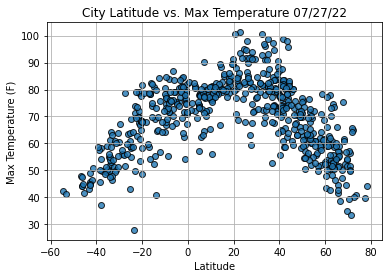

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

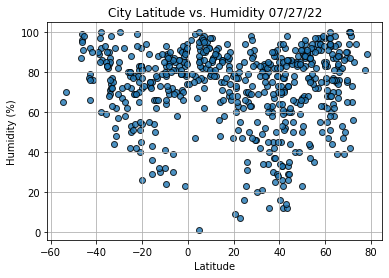

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

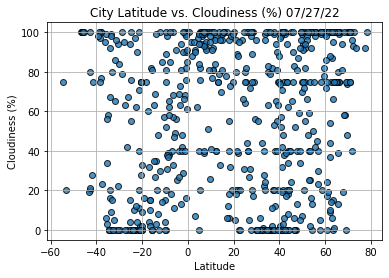

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

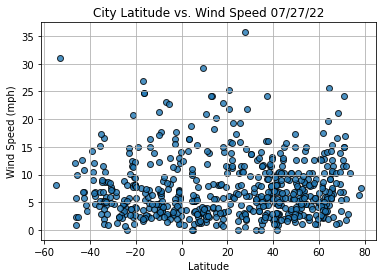

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [35]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [28]:
index13 = city_data_df.loc[13]
index13

City                       Wajima
Country                        JP
Date          2022-07-27 22:35:18
Lat                          37.4
Lng                         136.9
Max Temp                    78.94
Humidity                       82
Cloudiness                     99
Wind Speed                   5.23
Name: 13, dtype: object

In [32]:
city_data_df.head(10)["Lat"] >= 0

0     True
1     True
2    False
3     True
4     True
5    False
6     True
7     True
8    False
9     True
Name: Lat, dtype: bool

In [33]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2022-07-27 22:35:12,22.0752,-159.3190,84.52,63,20,12.66
1,Albany,US,2022-07-27 22:27:24,42.6001,-73.9662,82.58,52,99,2.93
3,Nemuro,JP,2022-07-27 22:35:13,43.3236,145.5750,62.31,98,94,8.32
4,Dudinka,RU,2022-07-27 22:35:14,69.4058,86.1778,53.85,75,74,8.21
6,Jamestown,US,2022-07-27 22:35:15,42.0970,-79.2353,74.71,71,100,10.36


In [36]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

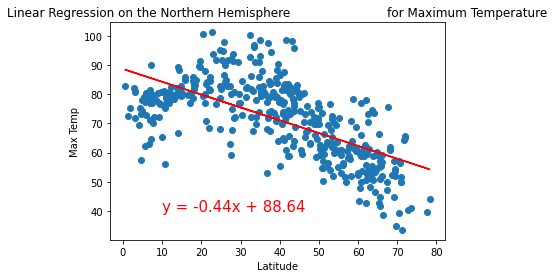

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

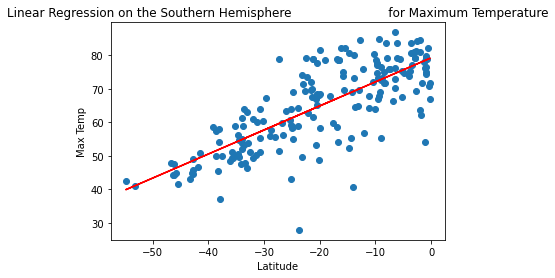

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

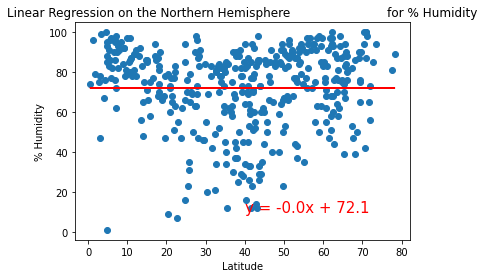

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

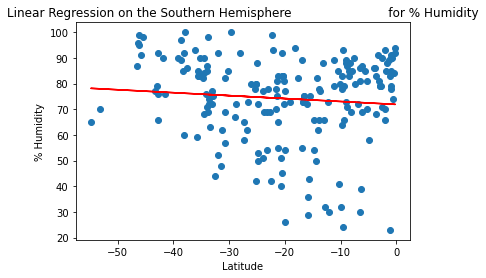

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

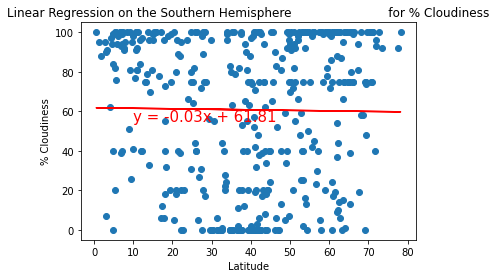

In [45]:
## Skill drill
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,55))

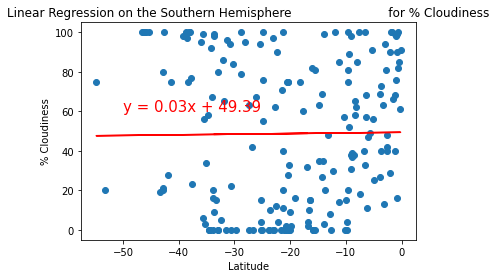

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

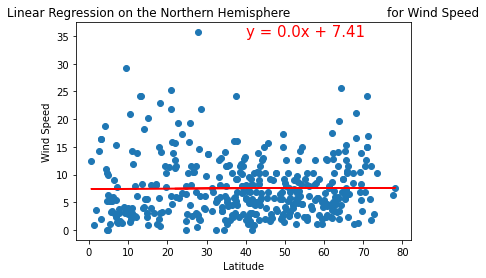

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

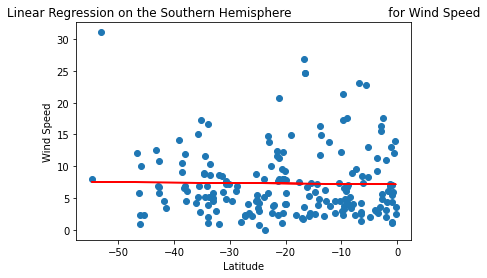

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))